In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Projects 18_Diagnostic Analytics Of Diabetes Patients By Alfin Bahru Rahmika Umar\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (768, 9)


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print("Ukuran awal DataFrame:", df.shape)
print("Informasi DataFrame awal:")
print(df.info())

# --- Deteksi Duplikat ---
duplicates = df[df.duplicated()]
print("Jumlah baris duplikat:", duplicates.shape[0])

# --- Deteksi Missing Values ---
missing = df.isnull().sum()
print("Missing values per kolom:\n", missing)

Ukuran awal DataFrame: (768, 9)
Informasi DataFrame awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Jumlah baris duplikat: 0
Missing values per kolom:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insul

In [7]:
# --- Deteksi Outliers ---
# Kita akan menggunakan metode IQR untuk kolom numerik
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

def remove_outliers(data, cols):
    data_clean = data.copy()
    for col in cols:
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_clean = data_clean[(data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)]
    return data_clean

# Bersihkan data: hapus duplikat, missing values, dan outliers
df_cleaned = df.drop_duplicates().dropna()
df_cleaned = remove_outliers(df_cleaned, numeric_cols)

print("Ukuran DataFrame setelah cleaning:", df_cleaned.shape)

Ukuran DataFrame setelah cleaning: (636, 9)


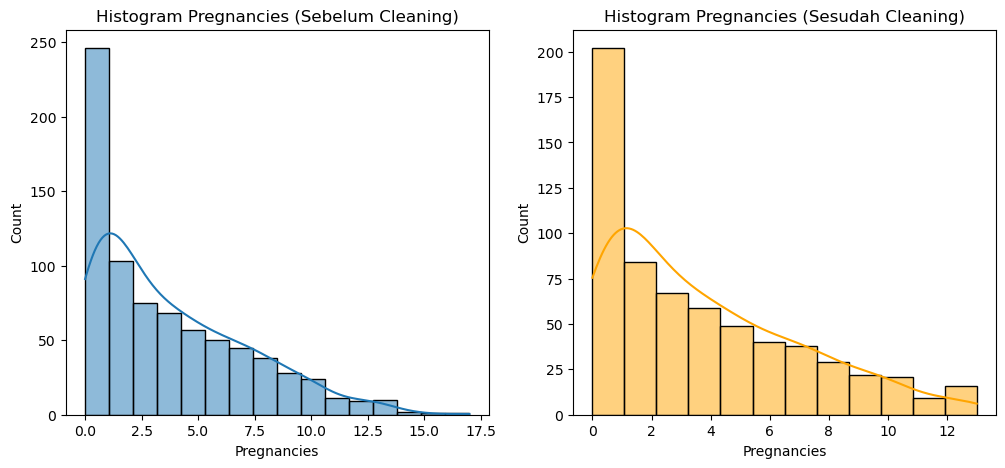

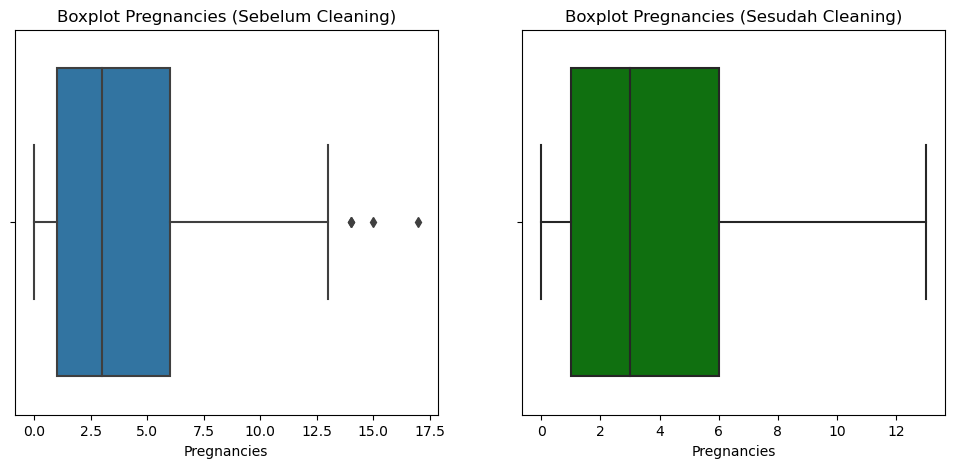

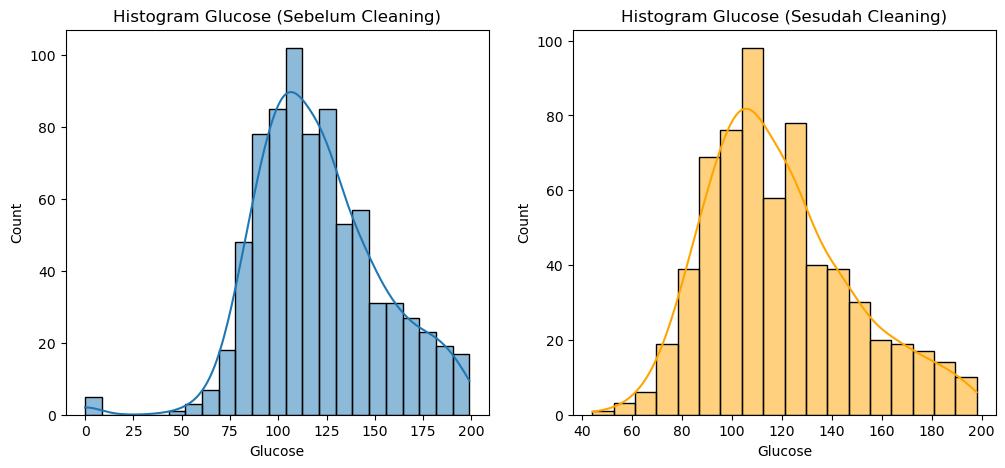

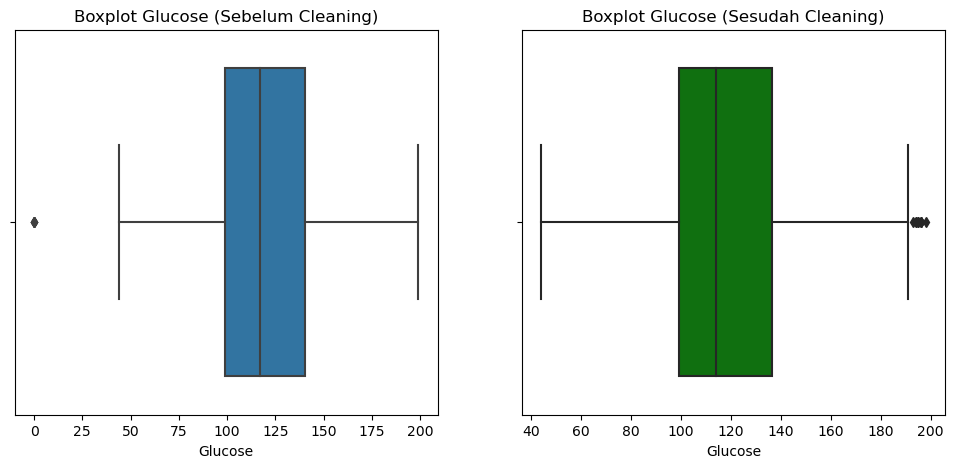

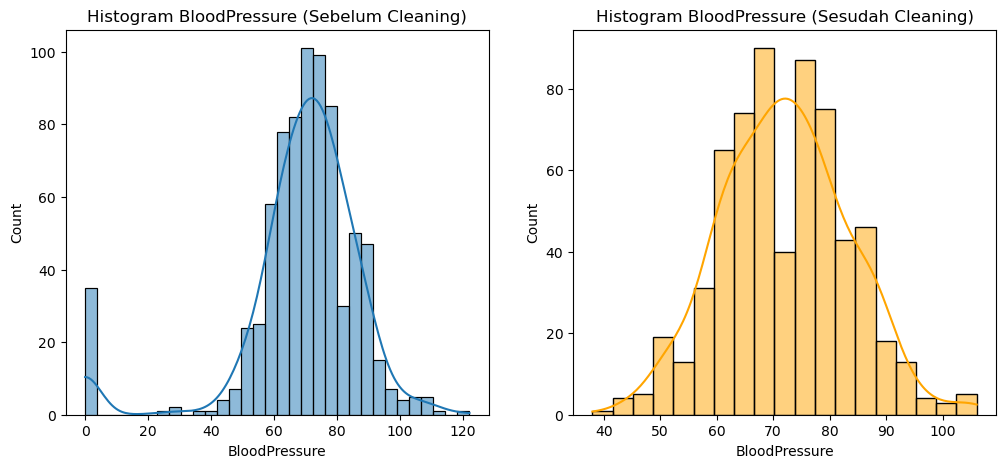

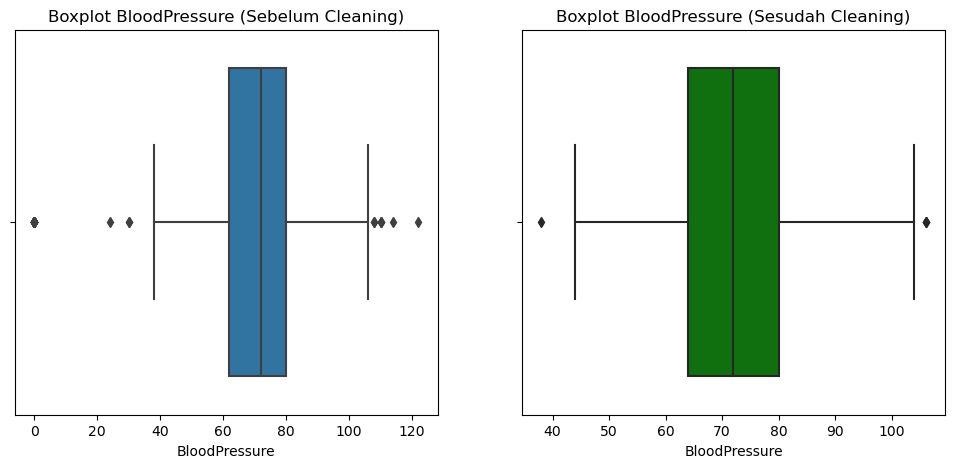

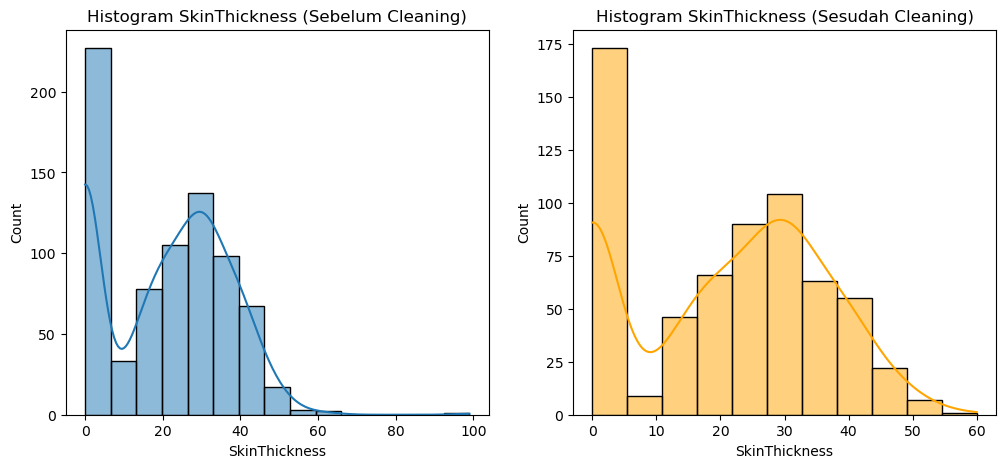

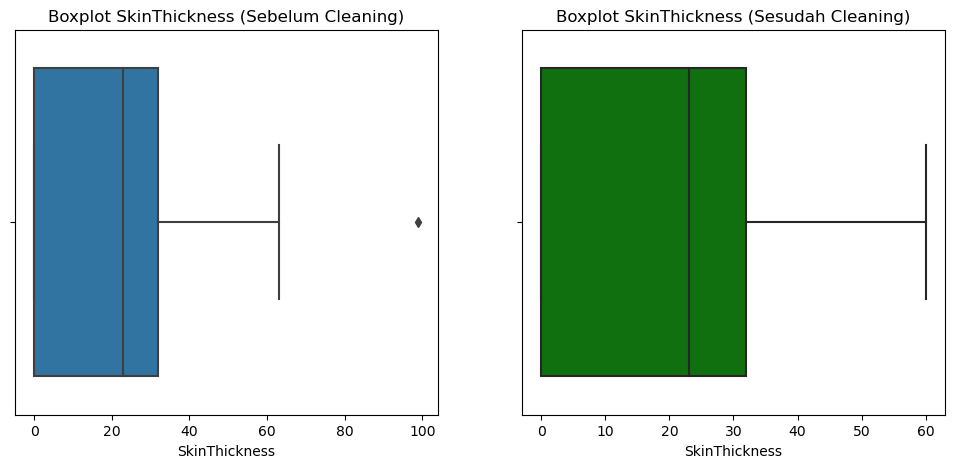

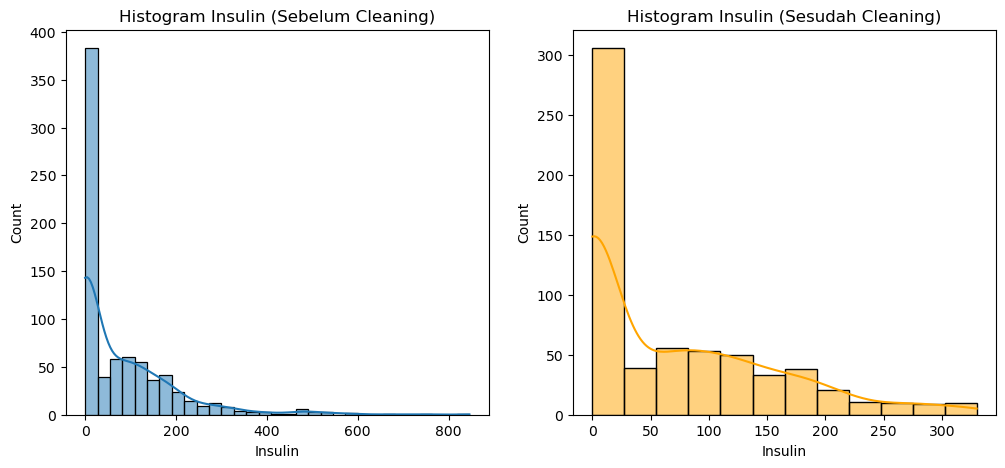

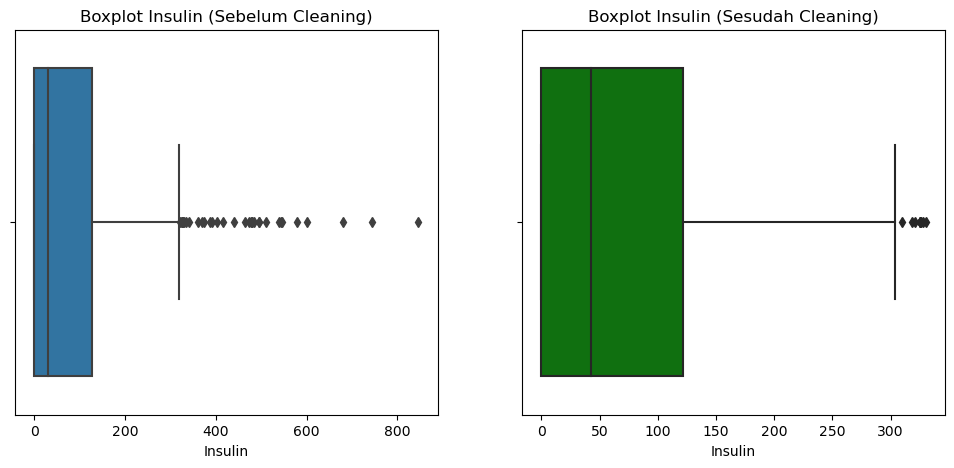

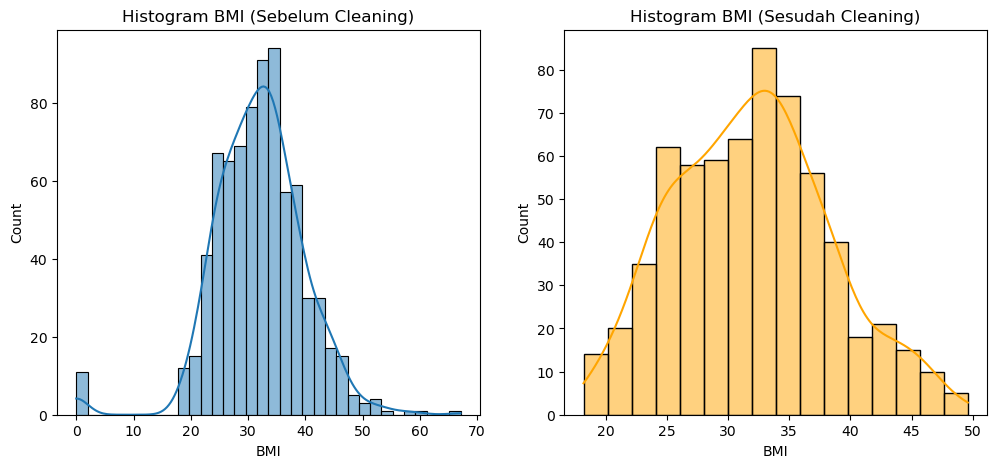

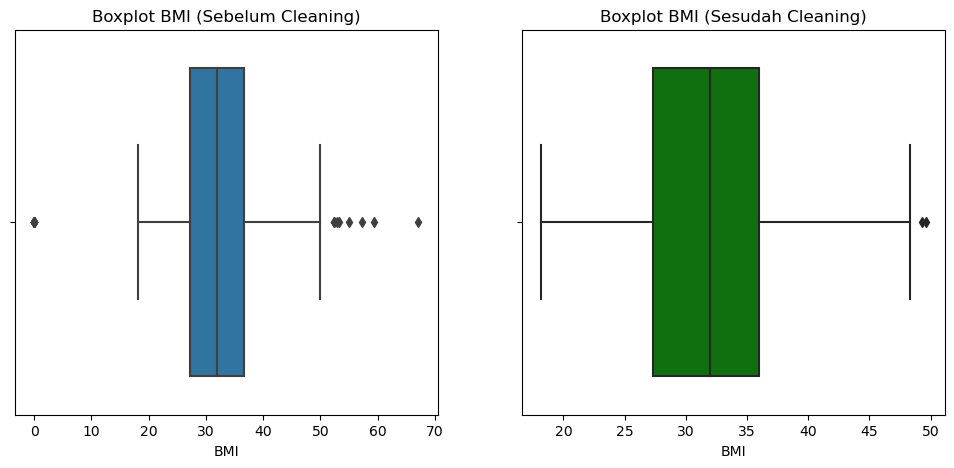

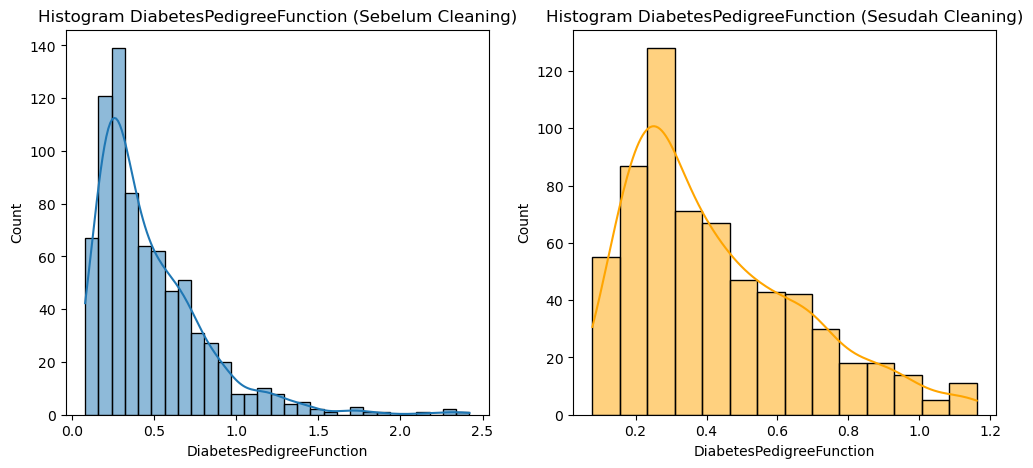

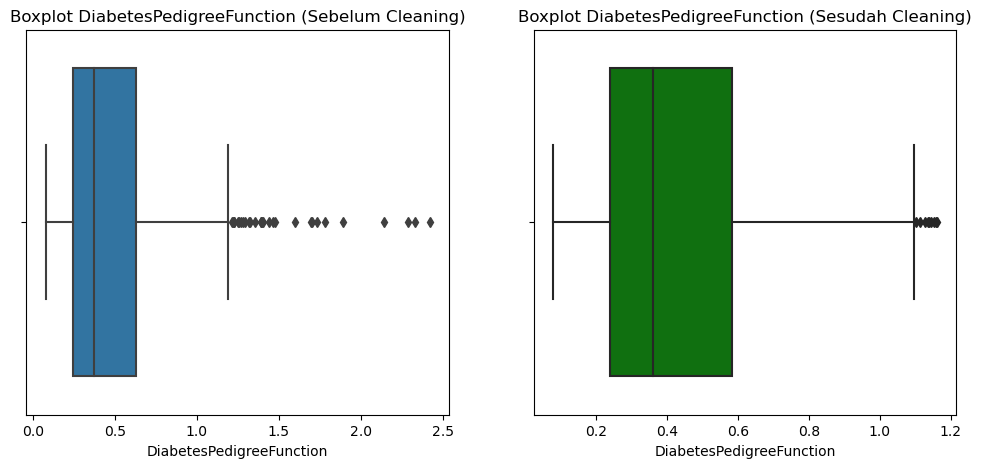

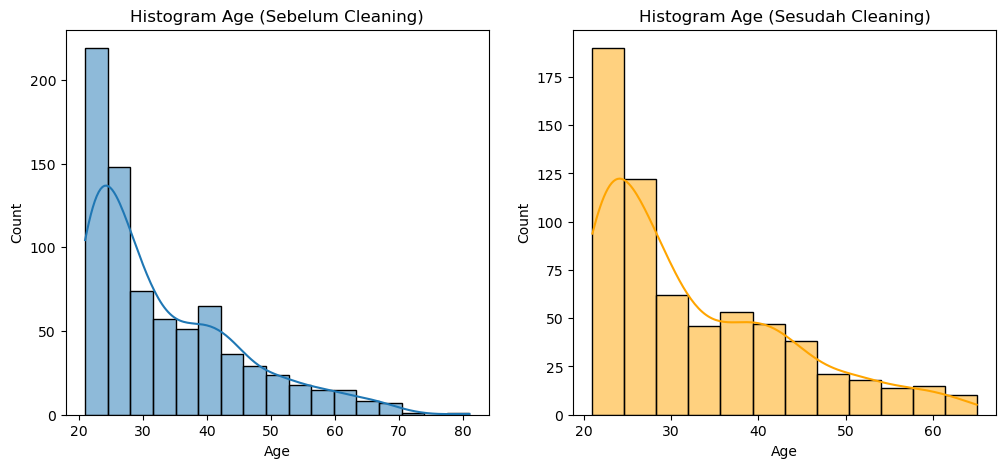

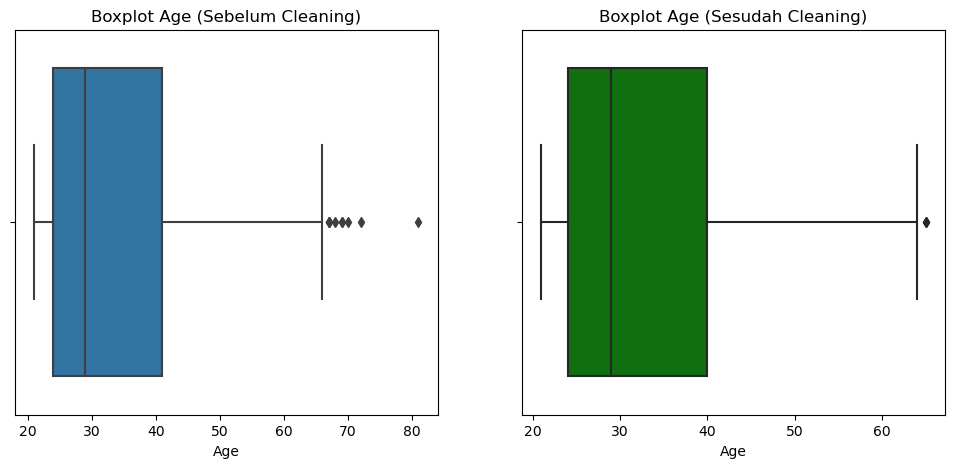

In [8]:
# --- Visualisasi Perbandingan Sebelum & Sesudah Cleaning ---
for col in numeric_cols:
    plt.figure(figsize=(12,5))
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram {col} (Sebelum Cleaning)')
    
    plt.subplot(1,2,2)
    sns.histplot(df_cleaned[col], kde=True, color='orange')
    plt.title(f'Histogram {col} (Sesudah Cleaning)')
    plt.show()
    
    # Box Plot
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col} (Sebelum Cleaning)')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df_cleaned[col], color='green')
    plt.title(f'Boxplot {col} (Sesudah Cleaning)')
    plt.show()

In [9]:
# --- Simpan Dataset Bersih ---
df_cleaned.to_csv('diabetes-cleaned.csv', index=False)
print("Dataset yang telah dibersihkan disimpan sebagai 'diabetes-cleaned.csv'")

Dataset yang telah dibersihkan disimpan sebagai 'diabetes-cleaned.csv'


In [10]:
# --- Perhitungan Metrik ---
total_participants = df_cleaned.shape[0]
total_patients = df_cleaned[df_cleaned['Outcome'] == 1].shape[0]
average_age = df_cleaned['Age'].mean()
average_glucose = df_cleaned['Glucose'].mean()
average_bmi = df_cleaned['BMI'].mean()

print("Total Participants:", total_participants)
print("Total Patients (Outcome = 1):", total_patients)
print("Average Age:", average_age)
print("Average Glucose:", average_glucose)
print("Average BMI:", average_bmi)

Total Participants: 636
Total Patients (Outcome = 1): 197
Average Age: 32.55503144654088
Average Glucose: 118.86949685534591
Average BMI: 31.964150943396223


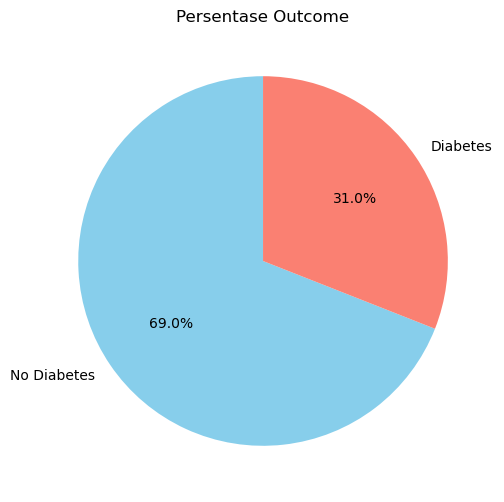

In [11]:
# --- Pie Chart: Outcome ---
outcome_counts = df_cleaned['Outcome'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(outcome_counts, labels=['No Diabetes','Diabetes'], autopct='%1.1f%%', startangle=90, 
        colors=['skyblue', 'salmon'])
plt.title('Persentase Outcome')
plt.show()

In [12]:
# --- Kelompokkan Umur ---
age_bins = [0, 20, 30, 40, 50, 100]
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-100']
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

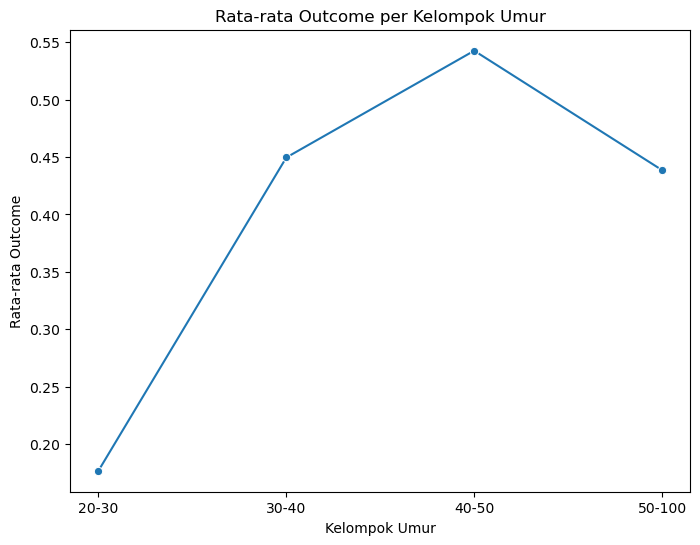

In [13]:
# --- Line Chart: Rata-rata Outcome per Kelompok Umur ---
age_outcome = df_cleaned.groupby('AgeGroup')['Outcome'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.lineplot(data=age_outcome, x='AgeGroup', y='Outcome', marker='o')
plt.title('Rata-rata Outcome per Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Rata-rata Outcome')
plt.show()

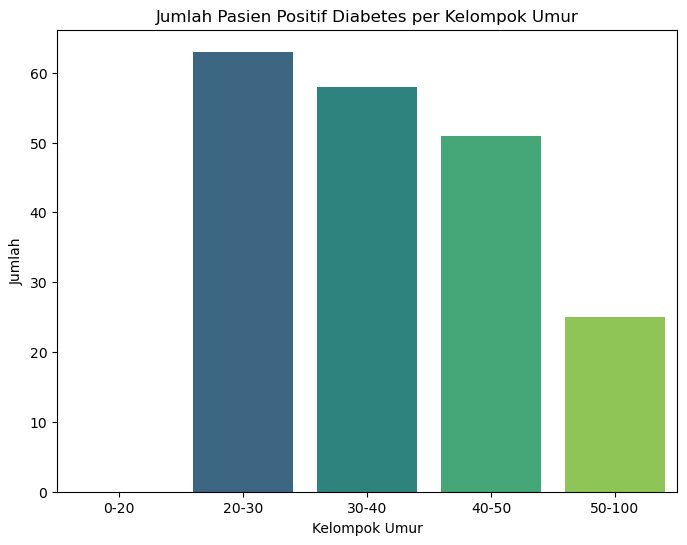

In [14]:
# --- Bar Chart: Pasien Positif Diabetes per Kelompok Umur ---
age_positive = df_cleaned[df_cleaned['Outcome'] == 1].groupby('AgeGroup').size().reset_index(name='Count')
plt.figure(figsize=(8,6))
sns.barplot(data=age_positive, x='AgeGroup', y='Count', palette='viridis')
plt.title('Jumlah Pasien Positif Diabetes per Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah')
plt.show()

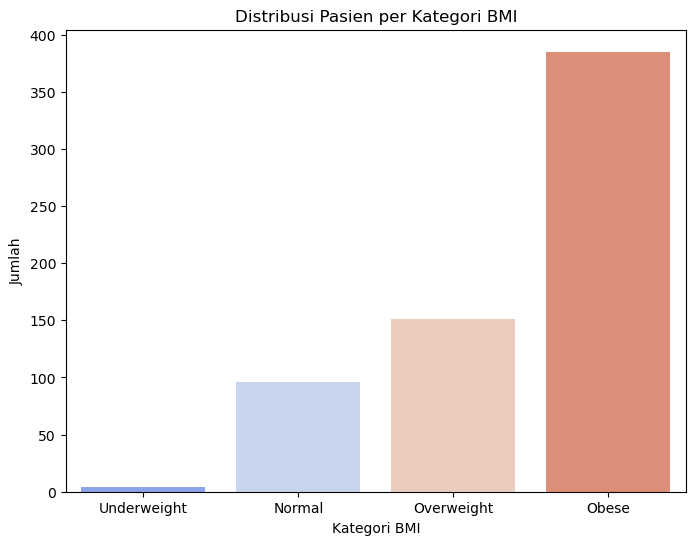

In [15]:
# --- Bar Chart: Distribusi Berdasarkan BMI ---
# Definisikan kategori BMI (batasan dapat disesuaikan)
bmi_bins = [0, 18.5, 25, 30, 50]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df_cleaned['BMICategory'] = pd.cut(df_cleaned['BMI'], bins=bmi_bins, labels=bmi_labels, include_lowest=True)
bmi_counts = df_cleaned.groupby('BMICategory').size().reset_index(name='Count')
plt.figure(figsize=(8,6))
sns.barplot(data=bmi_counts, x='BMICategory', y='Count', palette='coolwarm')
plt.title('Distribusi Pasien per Kategori BMI')
plt.xlabel('Kategori BMI')
plt.ylabel('Jumlah')
plt.show()

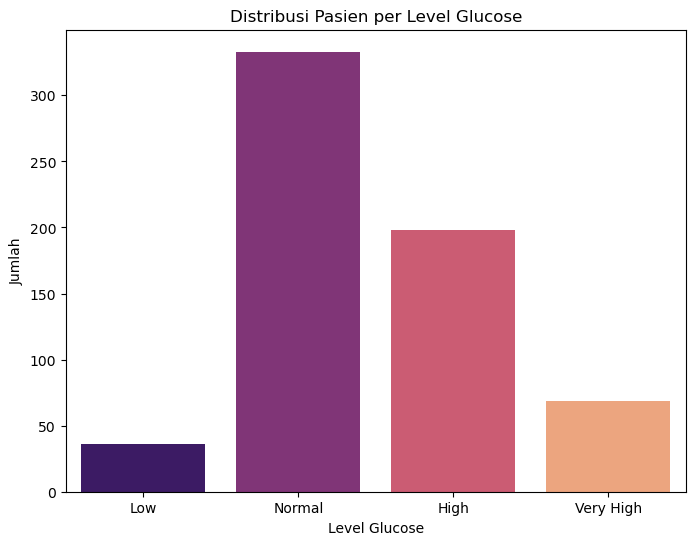

In [16]:
# --- Bar Chart: Distribusi Berdasarkan Glucose ---
glucose_bins = [0, 80, 120, 160, 300]
glucose_labels = ['Low', 'Normal', 'High', 'Very High']
df_cleaned['GlucoseLevel'] = pd.cut(df_cleaned['Glucose'], bins=glucose_bins, labels=glucose_labels, include_lowest=True)
glucose_counts = df_cleaned.groupby('GlucoseLevel').size().reset_index(name='Count')
plt.figure(figsize=(8,6))
sns.barplot(data=glucose_counts, x='GlucoseLevel', y='Count', palette='magma')
plt.title('Distribusi Pasien per Level Glucose')
plt.xlabel('Level Glucose')
plt.ylabel('Jumlah')
plt.show()

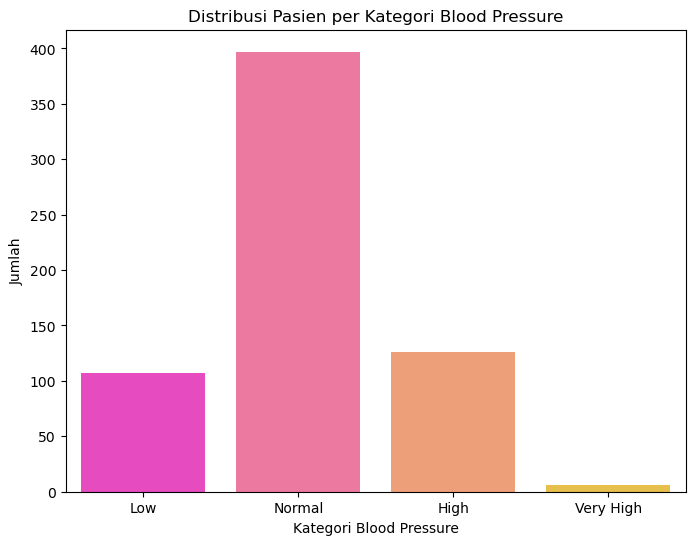

In [17]:
# --- Bar Chart: Distribusi Berdasarkan Blood Pressure ---
bp_bins = [0, 60, 80, 100, 200]
bp_labels = ['Low', 'Normal', 'High', 'Very High']
df_cleaned['BPCategory'] = pd.cut(df_cleaned['BloodPressure'], bins=bp_bins, labels=bp_labels, include_lowest=True)
bp_counts = df_cleaned.groupby('BPCategory').size().reset_index(name='Count')
plt.figure(figsize=(8,6))
sns.barplot(data=bp_counts, x='BPCategory', y='Count', palette='spring')
plt.title('Distribusi Pasien per Kategori Blood Pressure')
plt.xlabel('Kategori Blood Pressure')
plt.ylabel('Jumlah')
plt.show()

In [18]:
# import dash
# from dash import dcc, html
# import plotly.express as px

# # --- Mempersiapkan Figure dengan Plotly Express ---
# fig_pie = px.pie(values=outcome_counts.values, 
#                  names=['No Diabetes', 'Diabetes'], 
#                  title='Persentase Outcome')

# fig_line = px.line(age_outcome, x='AgeGroup', y='Outcome', markers=True, 
#                    title='Rata-rata Outcome per Kelompok Umur')

# fig_bar_age = px.bar(age_positive, x='AgeGroup', y='Count', 
#                      title='Jumlah Pasien Positif Diabetes per Kelompok Umur')

# fig_bar_bmi = px.bar(bmi_counts, x='BMICategory', y='Count', 
#                      title='Distribusi Pasien per Kategori BMI')

# fig_bar_glucose = px.bar(glucose_counts, x='GlucoseLevel', y='Count', 
#                          title='Distribusi Pasien per Level Glucose')

# fig_bar_bp = px.bar(bp_counts, x='BPCategory', y='Count', 
#                     title='Distribusi Pasien per Kategori Blood Pressure')

# # --- Membuat Dashboard ---
# app = dash.Dash(__name__)

# app.layout = html.Div([
#     html.H1("Dashboard Data Diabetes"),
#     html.Div([
#         html.H2("Metrik Utama"),
#         html.P(f"Total Participants: {total_participants}"),
#         html.P(f"Total Patients (Outcome = 1): {total_patients}"),
#         html.P(f"Average Age: {average_age:.2f}"),
#         html.P(f"Average Glucose: {average_glucose:.2f}"),
#         html.P(f"Average BMI: {average_bmi:.2f}")
#     ], style={'padding': '20px', 'border': '1px solid #ccc'}),
    
#     html.Div([
#         dcc.Graph(figure=fig_pie)
#     ]),
#     html.Div([
#         dcc.Graph(figure=fig_line)
#     ]),
#     html.Div([
#         dcc.Graph(figure=fig_bar_age)
#     ]),
#     html.Div([
#         dcc.Graph(figure=fig_bar_bmi)
#     ]),
#     html.Div([
#         dcc.Graph(figure=fig_bar_glucose)
#     ]),
#     html.Div([
#         dcc.Graph(figure=fig_bar_bp)
#     ])
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)
